In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
sunspot_data = pd.read_csv('dataset/sunspot_data.csv', usecols= ['Year', 'Month', 'Day', 'Number of Sunspots'], na_values=['-1'])

In [79]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                73718 non-null  int64  
 1   Month               73718 non-null  int64  
 2   Day                 73718 non-null  int64  
 3   Number of Sunspots  70471 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [80]:
# Renaming columns
sunspot_data.rename(columns={'Year': 'year', 'Month': 'month', 'Day': 'day', 'Number of Sunspots': 'sunspots_number'}, inplace=True)

In [81]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             73718 non-null  int64  
 1   month            73718 non-null  int64  
 2   day              73718 non-null  int64  
 3   sunspots_number  70471 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [82]:
#Coverting Data related columns to String
sunspot_data = sunspot_data.astype({'year': 'string', 'month': 'string', 'day': 'string'})

In [83]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             73718 non-null  string 
 1   month            73718 non-null  string 
 2   day              73718 non-null  string 
 3   sunspots_number  70471 non-null  float64
dtypes: float64(1), string(3)
memory usage: 2.2 MB


In [84]:
sunspot_data.head()

,year,month,day,sunspots_number
0,1818,1,1,NaN
1,1818,1,2,NaN
2,1818,1,3,NaN
3,1818,1,4,NaN
4,1818,1,5,NaN


In [85]:
sunspot_data['date_time'] = pd.to_datetime(sunspot_data["year"] + "/" + sunspot_data["month"] + "/" + sunspot_data["day"])

In [86]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             73718 non-null  string        
 1   month            73718 non-null  string        
 2   day              73718 non-null  string        
 3   sunspots_number  70471 non-null  float64       
 4   date_time        73718 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), string(3)
memory usage: 2.8 MB


In [87]:
#Datetime Indexing
sunspot_data = sunspot_data.set_index(['date_time'])

In [88]:
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73718 entries, 1818-01-01 to 2019-10-31
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             73718 non-null  string 
 1   month            73718 non-null  string 
 2   day              73718 non-null  string 
 3   sunspots_number  70471 non-null  float64
dtypes: float64(1), string(3)
memory usage: 2.8 MB


Text(0, 0.5, 'Number of Sunspots')

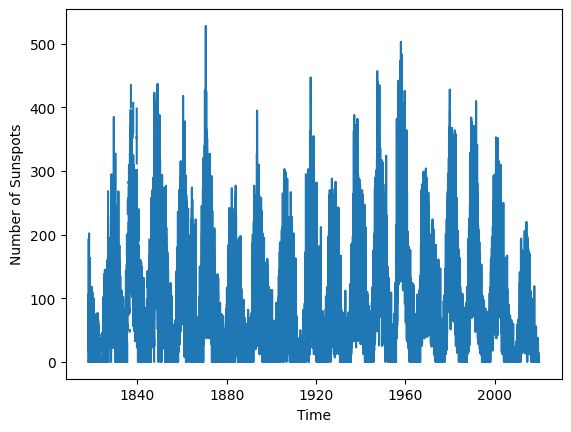

In [89]:
plt.plot(sunspot_data['sunspots_number'])
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')

In [90]:
#Checking missing values
sunspot_data.isnull().sum()

year                  0
month                 0
day                   0
sunspots_number    3247
dtype: int64

In [91]:
# Filling missing time stamps
sunspot_data = sunspot_data.reset_index()

In [92]:
time_series = sunspot_data[['date_time', 'sunspots_number']]
time_series.head()

,date_time,sunspots_number
0,1818-01-01,NaN
1,1818-01-02,NaN
2,1818-01-03,NaN
3,1818-01-04,NaN
4,1818-01-05,NaN


In [93]:
time_series = time_series.set_index(['date_time'])

In [101]:
time_series_resample = time_series.resample('D').mean().interpolate('linear')

In [102]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73718 entries, 1818-01-01 to 2019-10-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sunspots_number  70471 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [103]:
time_series_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73718 entries, 1818-01-01 to 2019-10-31
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sunspots_number  73711 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [104]:
time_series_resample.isna().sum()

sunspots_number    7
dtype: int64

In [106]:
time_series_resample.head(10)

,sunspots_number
date_time,
1818-01-01,NaN
1818-01-02,NaN
1818-01-03,NaN
1818-01-04,NaN
1818-01-05,NaN
1818-01-06,NaN
1818-01-07,NaN
1818-01-08,65.0
1818-01-09,59.4


In [110]:
time_series_resample['sunspots_number'] = time_series_resample['sunspots_number'].bfill()

In [111]:
time_series_resample.isna().sum()

sunspots_number    0
dtype: int64

In [113]:
time_series_resample.to_csv('dataset/sunspot_data_filled.csv', index=True)